In [2]:
import pandas as pd

In [17]:
df=pd.read_csv('../../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
95,Male,65.117485,165.717112
96,Male,71.701234,193.094164
97,Male,66.832878,180.683887
98,Male,66.471275,172.773723


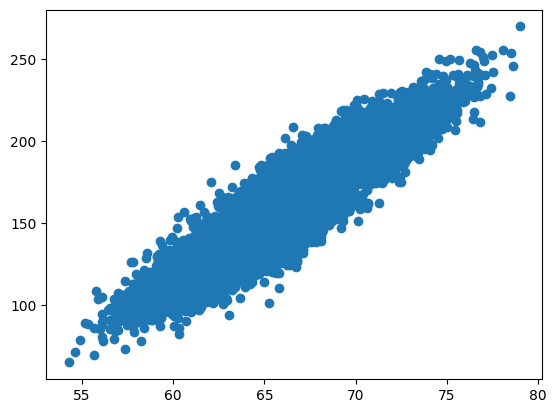

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['Height'])
y = np.array(df['Weight'])
plt.scatter(x, y);

[219.16147993 180.07254619 221.19180859 ... 142.15047514 182.01991949
 127.30437133]


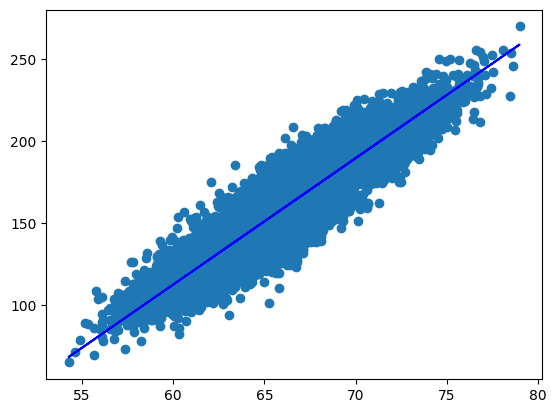

In [19]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit, color="blue")
print(yfit)

12/10/22

In [17]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [18]:
def PolyRegression(dg=2, **kwargs):
    return make_pipeline(PolynomialFeatures(dg), LinearRegression(**kwargs))

In [19]:
def make_data(N,err=1.0,rseed=1):
    rng=np.random.RandomState(rseed)
    X=rng.rand(N,1)**2
    y=10-1./(X.ravel()+0.1)
    if err > 0:
        y+=err*rng.rand(N)
    return X,y
X, y=make_data(40)

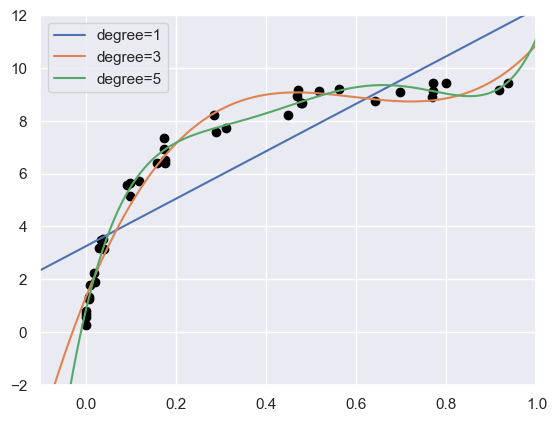

In [23]:
X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,5]:
    y_test=PolyRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')